<a href="https://colab.research.google.com/github/BenjoCowley/PythonForDataAnalysisAtPNI/blob/master/Lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Logistic regression

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# generate data
if True:
  num_features = 10
  num_samples_per_class = 100
  x_A = np.random.normal(loc=0., scale=1., size=(num_features,num_samples_per_class))
  x_B = np.random.normal(loc=0.5, scale=1., size=(num_features,num_samples_per_class))
  X = np.concatenate((x_A, x_B), axis=1)

  y = np.zeros((2*num_samples_per_class,))
  y[num_samples_per_class:] = 1.

  # X: (10 features x 200 samples)
  # y: (200 samples), output


## Exercise 1: Perform logistic regression
## and compute accuracy between predicted and ground truth y's
#  (Do this together as class)

logreg = LogisticRegression()
logreg.fit(X.T, y)

y_hat = logreg.predict(X.T)

y_hat_prob = logreg.predict_proba(X.T)

accuracy = np.sum(y_hat == y) / y.size

print(accuracy)



0.82


# Section 2: Increasing number of features

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


Text(0, 0.5, 'accuracy')

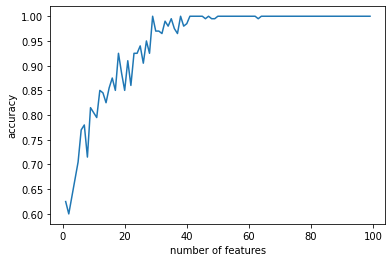

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

## Exercise 2: Write function to generate data with num_features
##   (Do this together as class)
def generate_data(num_features):
  num_samples_per_class = 100
  x_A = np.random.normal(loc=0., scale=1., size=(num_features,num_samples_per_class))
  x_B = np.random.normal(loc=0.5, scale=1., size=(num_features,num_samples_per_class))
  X = np.concatenate((x_A, x_B), axis=1)

  y = np.zeros((2*num_samples_per_class,))
  y[num_samples_per_class:] = 1.

  return X, y

## Exercise 3: 
##   We want to see accuracy vs. an increasing number of features.
##   Consider numbers of features from 1 to 50.
##   Regenerate data and compute the accuracy for each number.
##   Plot accuracy vs. number of features.
#   (Do on your own, but not as a breakout.)

logreg = LogisticRegression()

accuracies = []
nums_features = np.arange(1,100)
for num_features in list(nums_features):
  X, y = generate_data(num_features)
  logreg.fit(X.T, y)
  y_hat = logreg.predict(X.T)
  accuracy = np.sum(y_hat == y)/ y.size

  accuracies.append(accuracy)

print(nums_features)
plt.plot(nums_features, accuracies)
plt.xlabel('number of features')
plt.ylabel('accuracy')



# Section 3: Training and test sets

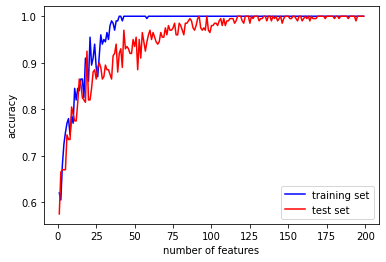

In [17]:
## Exercise 4:
##  Re-do section 3. Except for each number of features, 
##    generate both a training and test set. 
##  Compute accuracy both on the training data and test data.
##  Plot both curves (one for training set accuracy, one for test set accuracy.)

## HELPER FUNCTIONS

def generate_data(num_features):
  num_samples_per_class = 100
  x_A = np.random.normal(loc=0., scale=1., size=(num_features,num_samples_per_class))
  x_B = np.random.normal(loc=0.5, scale=1., size=(num_features,num_samples_per_class))
  X = np.concatenate((x_A, x_B), axis=1)

  y = np.zeros((2*num_samples_per_class,))
  y[num_samples_per_class:] = 1.

  return X, y


## MAIN SCRIPT

logreg = LogisticRegression()

accuracies_train = []
accuracies_test = []
nums_features = np.arange(1,200)
for num_features in list(nums_features):
  # generate training and test data
  X_train, y_train = generate_data(num_features)
  X_test, y_test = generate_data(num_features)

  # train my model
  logreg.fit(X_train.T, y_train)

  # accuracy for training set
  y_train_hat = logreg.predict(X_train.T)

  accuracy = np.sum(y_train_hat == y_train)/ y_train.size
  accuracies_train.append(accuracy)

  # accuracy for test set
  y_test_hat = logreg.predict(X_test.T)

  accuracy = np.sum(y_test_hat == y_test)/ y_test.size
  accuracies_test.append(accuracy)

plt.plot(nums_features, accuracies_train, '-b', label='training set')
plt.plot(nums_features, accuracies_test, '-r', label='test set')
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.legend()

